In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
np.random.uniform()

0.7805813923988525

In [27]:
nsteps = 100              # Number of steps in our lil simulation
ntraces = 10
x = np.zeros(shape=(nsteps,ntraces))    # A placeholder for the trajectories we'll generate. Each will be a column.
wiggle = 0.001                          # The standard deviation of the original noise in x0

r = 3.9
for itrace in range(ntraces):
    starting_points = np.random.uniform(low=0, high=1-wiggle) + np.array([0,wiggle])
    for ipair in range(2):
        x[0,ipair] = starting_points(ipair)
        x[0,ipair] = 0.6+np.random.randn(1)*wiggle
    for istep in range(1,nsteps):
        x[istep,itrace] = r*x[istep-1,itrace]*(1-x[istep-1,itrace])

fig = plt.figure(figsize=(10,5))
plt.plot(np.std(x,axis=1))
plt.xlabel('Time');
plt.ylabel('Variability (sd) of trajectories');

TypeError: 'numpy.ndarray' object is not callable

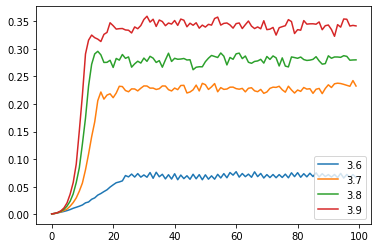

In [28]:
# Approach with pairs of trajectories

nsteps = 100
ntrials = 1000
wiggle = 0.001 # The difference between starting points in a pair

x = np.zeros(shape=(nsteps,2))              # For those 2 traces in a pair
diff = np.zeros(shape=(nsteps,ntrials))     # absolute Differences between trajectories in each pair

for r in np.arange(3.6, 4.0, 0.1):
    for itrial in range(ntrials):
        starting_point = np.random.uniform(low=0, high=1-wiggle) + np.array([0, wiggle])
        for ipair in range(2):
            x[0,ipair] = starting_point[ipair]
            for istep in range(1,nsteps):
                x[istep,ipair] = r*x[istep-1,ipair]*(1-x[istep-1,ipair])
        diff[:,itrial] = np.abs(x[:,1] - x[:,0])

    plt.plot(np.mean(diff, axis=1), label=np.round(r,decimals=2));

plt.legend(loc='lower right');